In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [36]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [37]:
data = pd.read_csv('../Dataset/water_potability.csv')
print("{} rows and {} columns".format(*data.shape))
data.head(10)

3276 rows and 10 columns


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [38]:
data.duplicated().sum()
# There are no duplicated rows

0

In [39]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [41]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Text(69.0, 0.5, 'Rows')

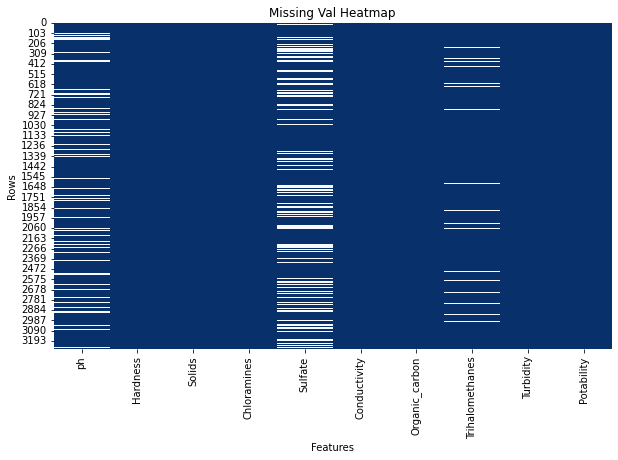

In [42]:
plt.rcParams['figure.figsize'] = (10, 6)

missing_val_heatmap = sns.heatmap(data.notna(), cbar=False, cmap="Blues", cbar_kws={'label': 'Missing Values'})
missing_val_heatmap.set_title("Missing Val Heatmap")
missing_val_heatmap.set_xlabel("Features")
missing_val_heatmap.set_ylabel("Rows")


### There are multiple missing values in the dataset

* ph
* Sulfate
* Trihalomethanes

## Exploratory Data Analysis

In [43]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<AxesSubplot:ylabel='Potability'>

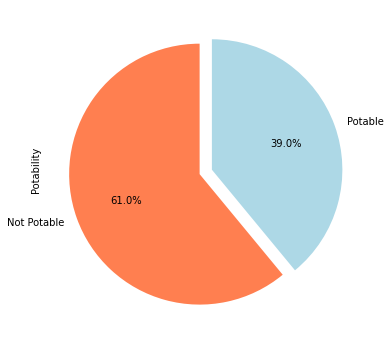

In [44]:

# Pie cart for Potability
data['Potability'].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        explode=(0.1, 0), 
        figsize=(12, 6),
        labels=['Not Potable', 'Potable'],
        colors=['coral', 'lightblue'],
        )


In [45]:
f"{data['Potability'].value_counts()[0]/data.shape[0] * 100 :.1f}% of the water is not potable"

'61.0% of the water is not potable'

#### Distribution of the Features

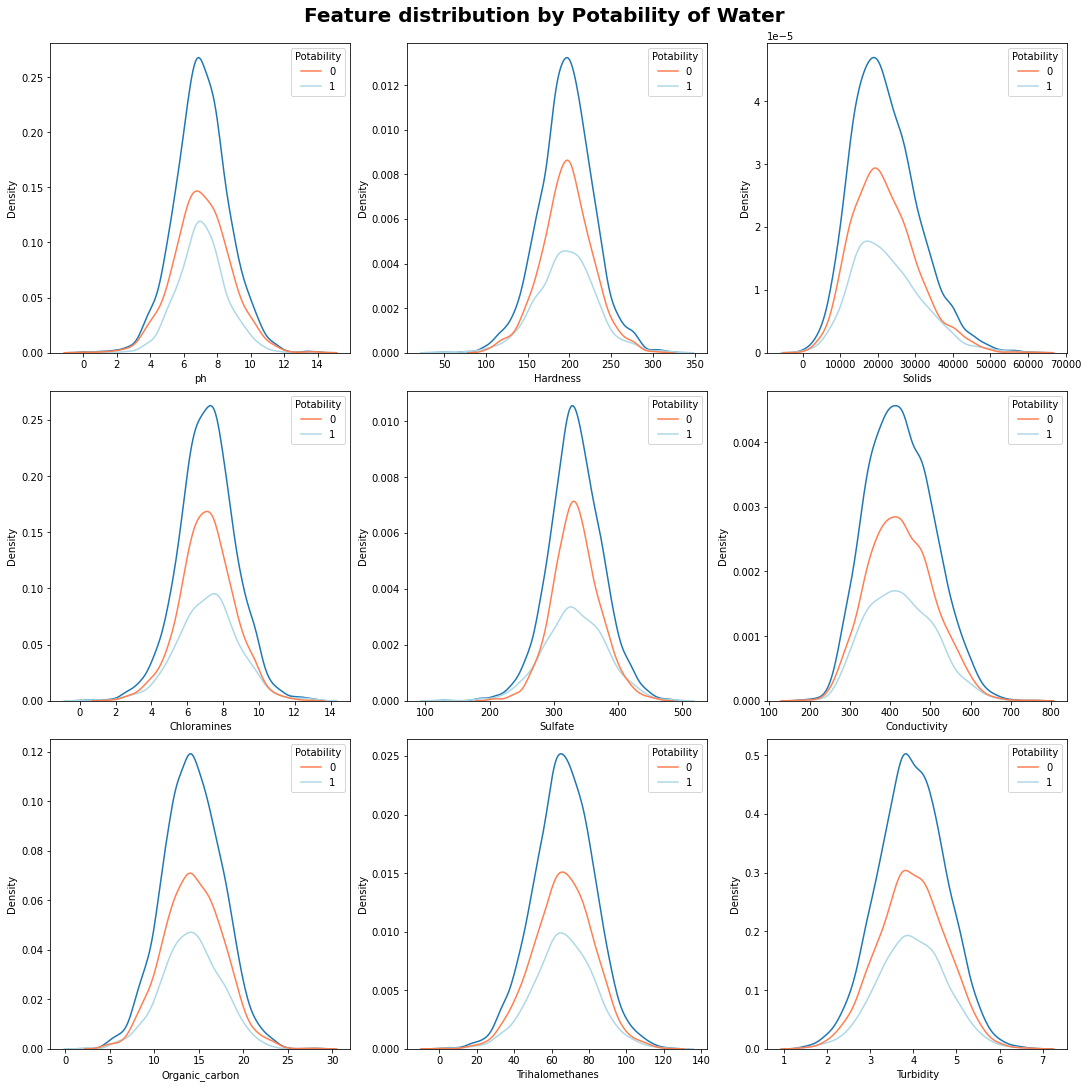

In [46]:

fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)

plt.suptitle('Feature distribution by Potability of Water', weight='bold', size=20)

for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data[feature])
    sns.kdeplot(data = data ,hue ='Potability',x=feature, palette=['coral', 'lightblue'])




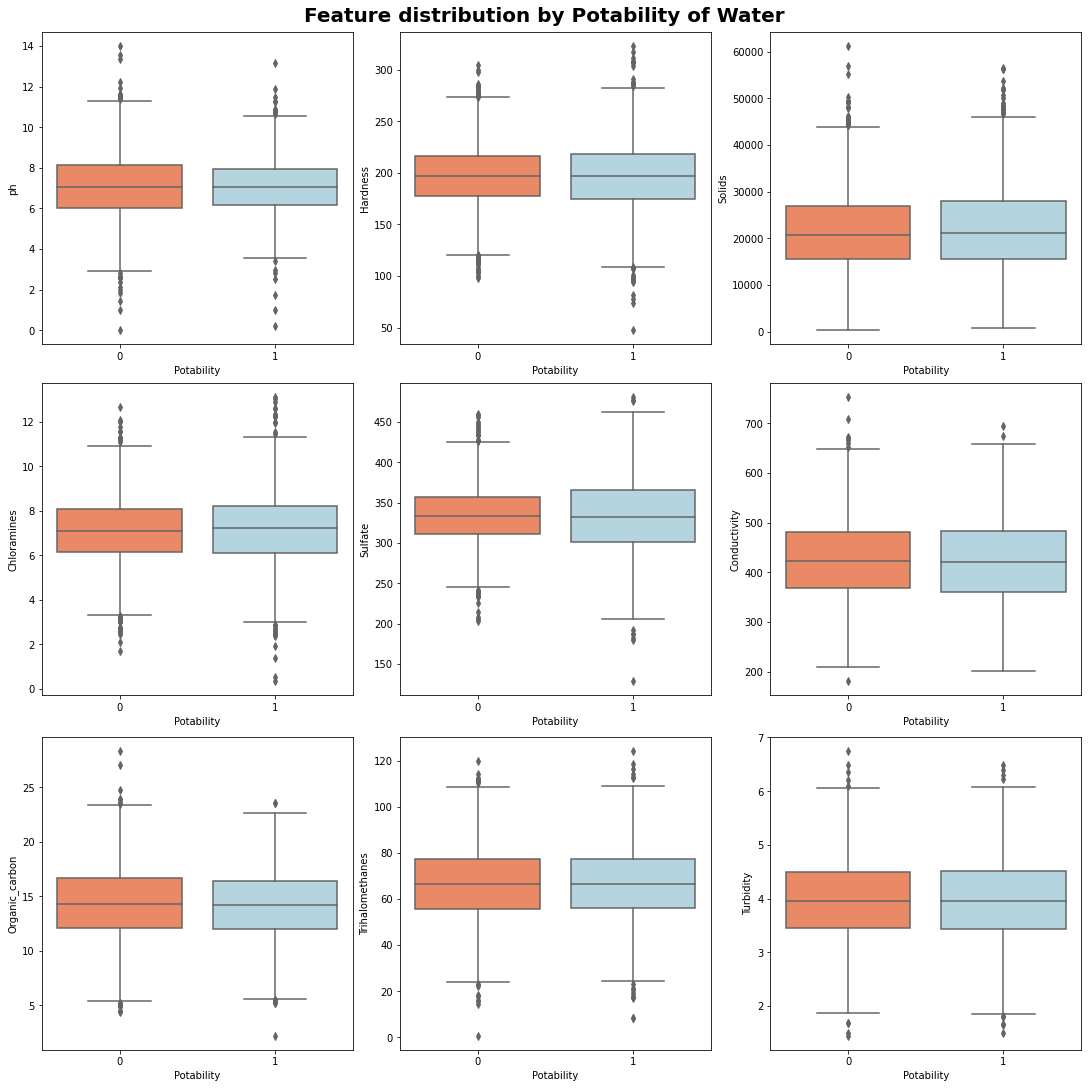

In [47]:

fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)

plt.suptitle('Feature distribution by Potability of Water', weight='bold', size=20)

for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.boxplot(data = data ,x ='Potability',y=feature, palette=['coral', 'lightblue'])
    

We can see that the distribution has outliers.

<AxesSubplot:>

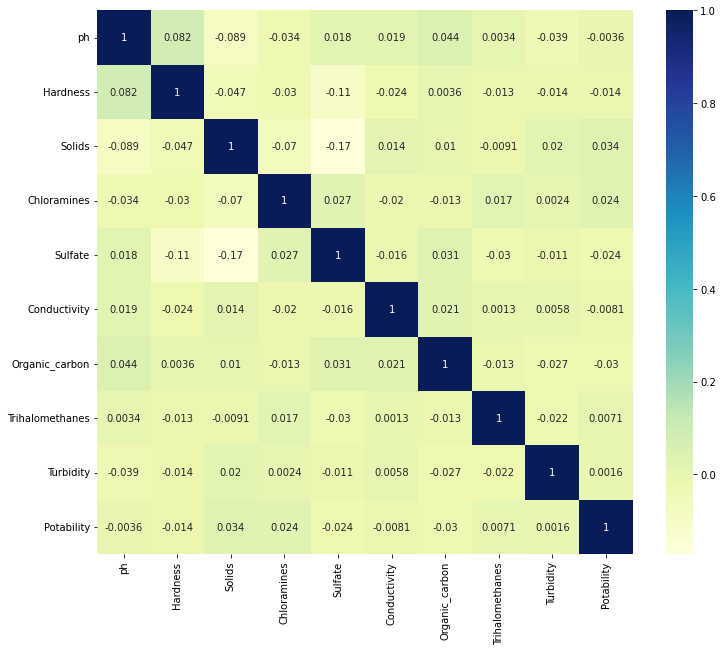

In [48]:
corr = data.corr()
f, ax = plt.subplots(figsize=(12, 10))
cmap = 'YlGnBu'

sns.heatmap(corr, annot=True, cmap=cmap, ax=ax)

We can see that none of the features have high correlation with each other.
This makes it difficult to predict the missing values.

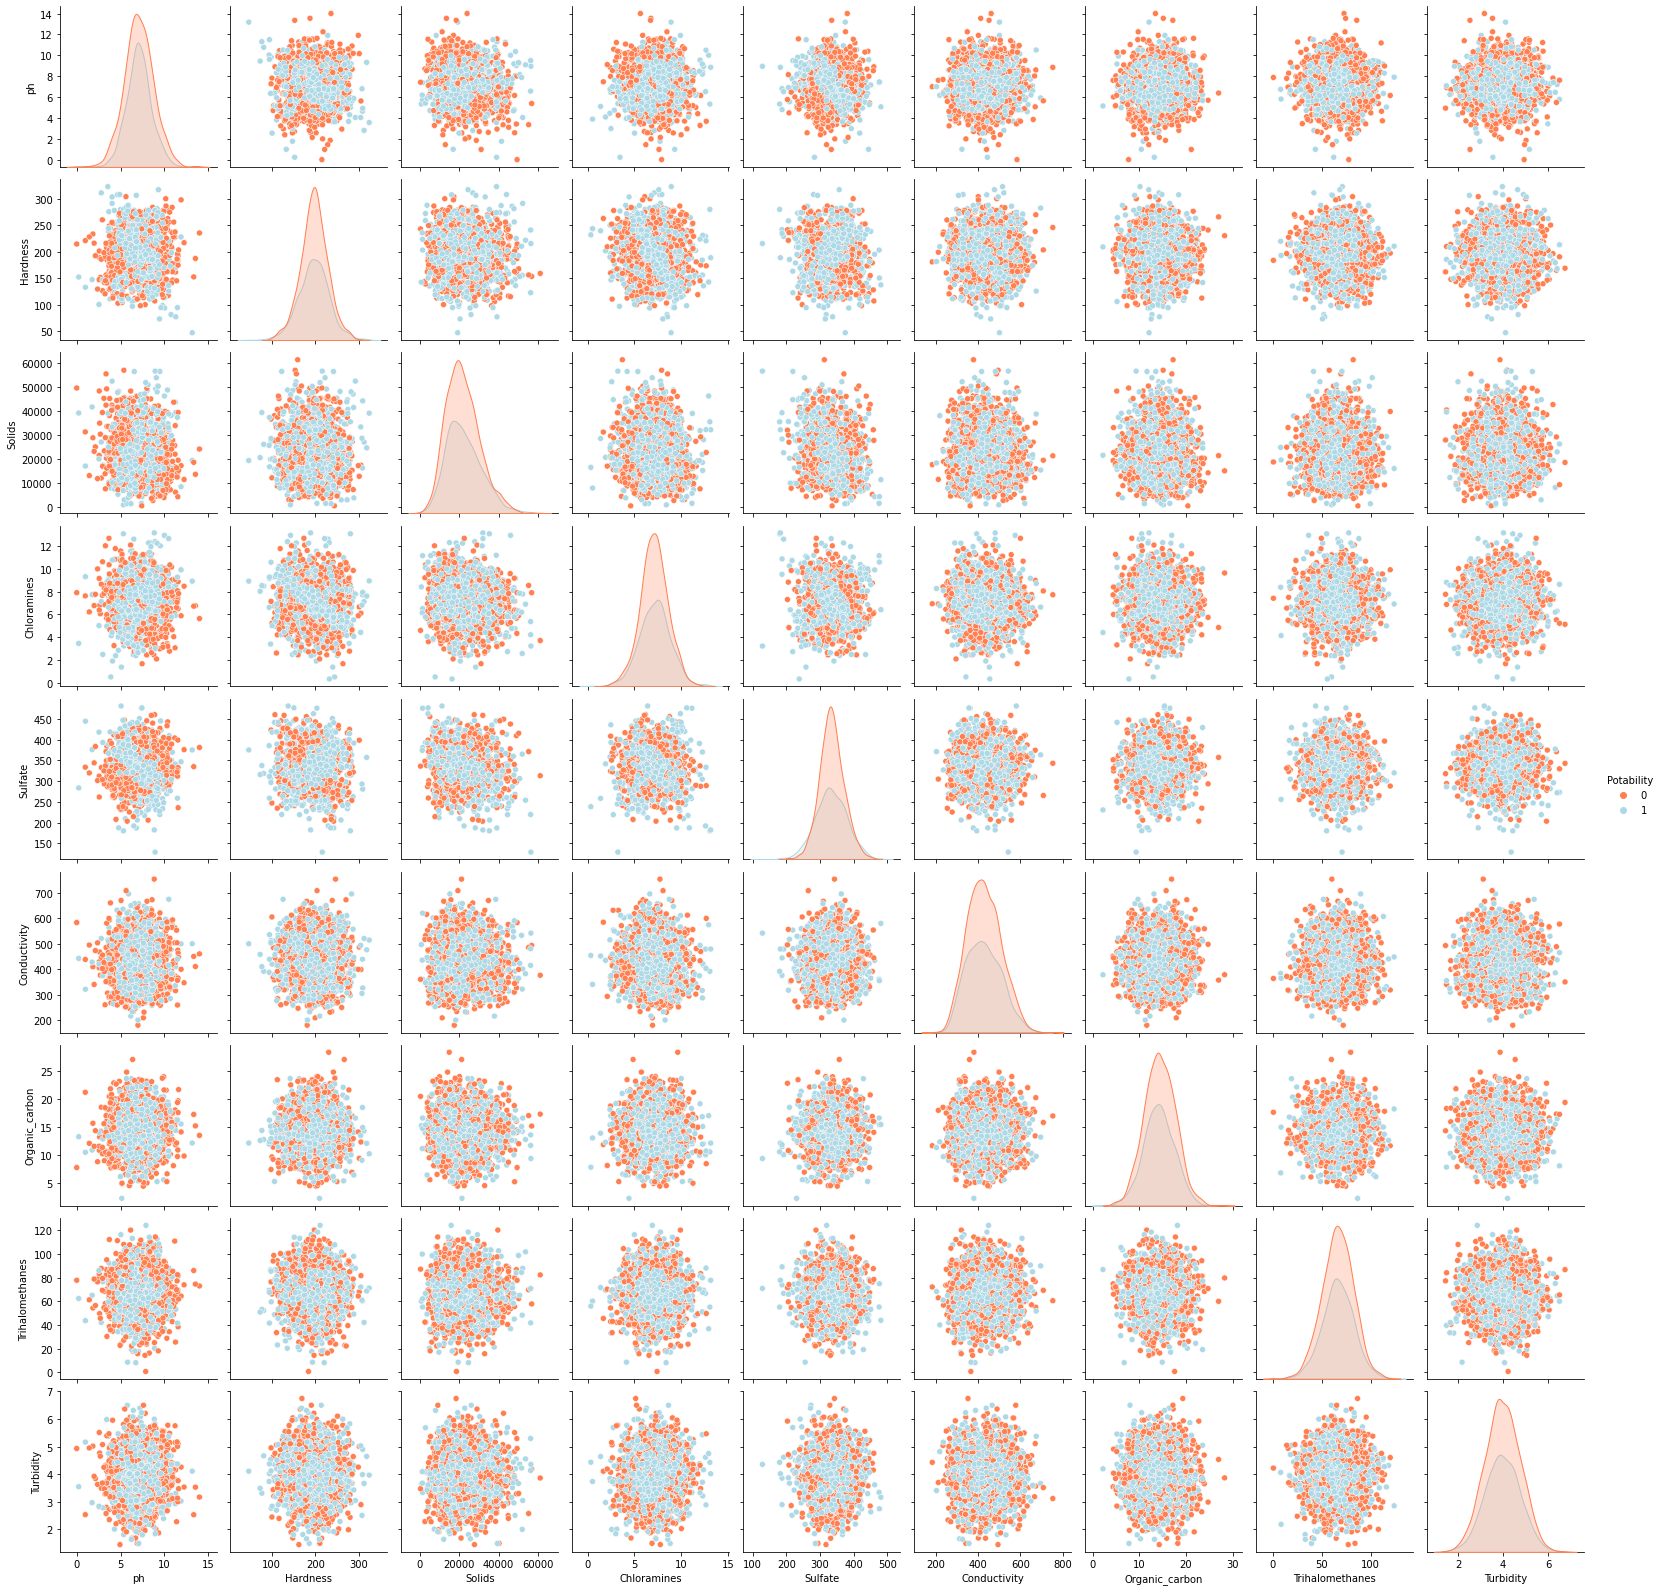

In [49]:
sns.pairplot(data = data, hue = 'Potability', palette=['coral', 'lightblue'])

## Feature Engineering

#### Distribution of the Features

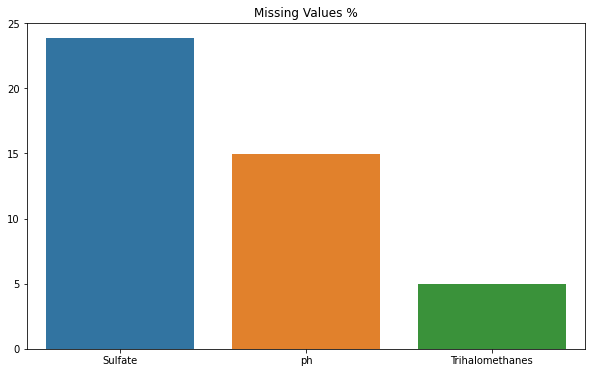

In [50]:
missing_values = data.isna().sum()*100/data.shape[0]
missing_values = missing_values[missing_values>0]
missing_values.sort_values(inplace=True,ascending=False)

sns.barplot(x=missing_values.index,y=missing_values.values)
plt.title('Missing Values %')
plt.show()

In [51]:
# Sulfate
upper_sul = data['Sulfate'].mean() + 3*data['Sulfate'].std()
lower_sul = data['Sulfate'].mean() - 3*data['Sulfate'].std()
sulfate_mean = data[(data['Sulfate']>=lower_sul) &(data['Sulfate']<=upper_sul)]['Sulfate'].mean()
# Replacing with mean
data['Sulfate'].fillna(sulfate_mean,inplace=True)

In [52]:
# PH
upper_ph = data['ph'].mean() + 3*data['ph'].std()
lower_ph = data['ph'].mean() - 3*data['ph'].std()
ph_mean = data[(data['ph']>=lower_ph) &(data['ph']<=upper_ph)]['ph'].mean()
# Replacing with mean
data['ph'].fillna(ph_mean,inplace=True)

In [53]:
# Trihalomethanes
upper_tri = data['Trihalomethanes'].mean() + 3*data['Trihalomethanes'].std()
lower_tri = data['Trihalomethanes'].mean() - 3*data['Trihalomethanes'].std()
trihalomethanes_mean = data[(data['Trihalomethanes']>=lower_tri) &(data['Trihalomethanes']<=upper_tri)]['Trihalomethanes'].mean()
# Replacing with mean
data['Trihalomethanes'].fillna(trihalomethanes_mean,inplace=True)

In [54]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

#### Dealing With Outliers

In [55]:
# data_new = data.copy()
# for col in data_new.columns[:-1]:
#     mean = data_new[data_new[col].notna()][col].mean()
#     std = data_new[data_new[col].notna()][col].std()
#     low = mean - 3*std
#     high = mean + 3*std
#     data_new = data_new[(data_new[col] > low) & (data_new[col] < high)]
    
# old_rows = data.shape[0]
# new_rows = data_new.shape[0]

# print(f"Old rows: {old_rows}, New rows: {new_rows}, Removed rows: {old_rows - new_rows}")

# data = data_new.copy()

# This step is making the model perform worse

## Data Preprocessing

In [56]:
X = data_new.drop('Potability', axis=1).values
y = data_new['Potability'].values

#### Splitting the Data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2497, 9), (625, 9), (2497,), (625,))

#### Standardization

In [58]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

## Modelling

In [59]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Knn': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGgboost': XGBClassifier(),
}

In [60]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

def get_model_result(model, X_train, y_train, X_test, y_test):
    scores = cross_validate(model, X_train, y_train, scoring=scoring, return_train_score=False, cv=5)
    result = {k.split('_')[1].title(): v.mean() for k, v in scores.items() if k not in ['fit_time', 'score_time']}
    
    return result
    

results={}
for name,model in models.items():
    results[name] = get_model_result(model, X_train, y_train, X_test, y_test)
    
results = pd.DataFrame(results).T

In [61]:
results = results.sort_values('Roc', ascending=False)
results

,Accuracy,Precision,Recall,F1,Roc
Random Forest,0.657981,0.625914,0.292509,0.397137,0.652635
XGgboost,0.634759,0.538392,0.386885,0.449008,0.625996
Gradient Boosting,0.647564,0.613417,0.234413,0.338662,0.622231
Knn,0.626351,0.522491,0.380689,0.440185,0.610419
Gaussian Naive Bayes,0.623538,0.538222,0.181493,0.270341,0.588575
Decision Tree,0.594710,0.475563,0.479242,0.477284,0.573291
Adaboost,0.601925,0.458318,0.187737,0.265727,0.555078
Logistic Regression,0.613937,0.000000,0.000000,0.000000,0.465951


We can see that no model is able to give a good Precision.
This is because of the corelation between the features is very low.

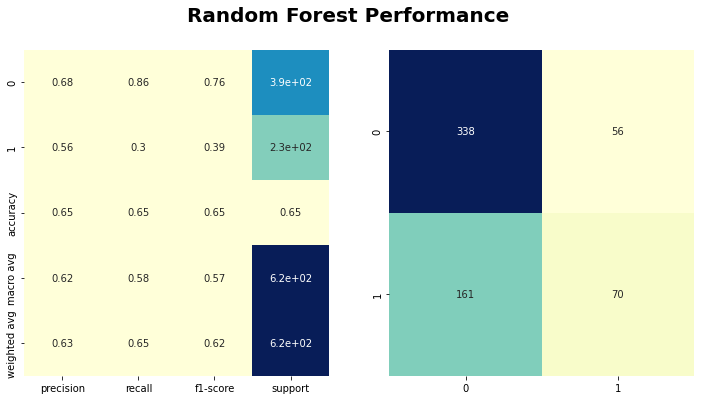

ROC AUC Score: 0.5804491616674358


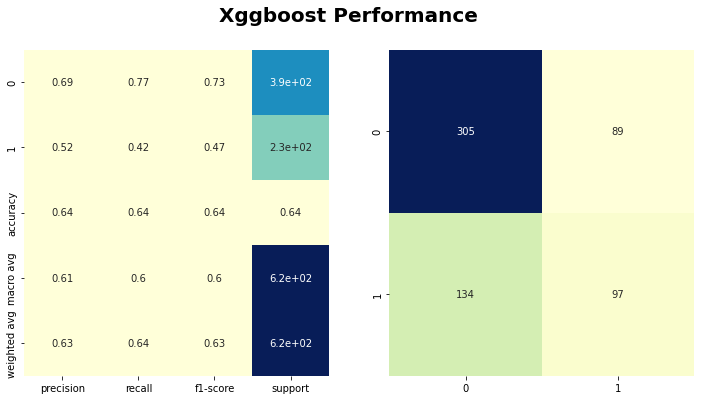

ROC AUC Score: 0.5970125475201616


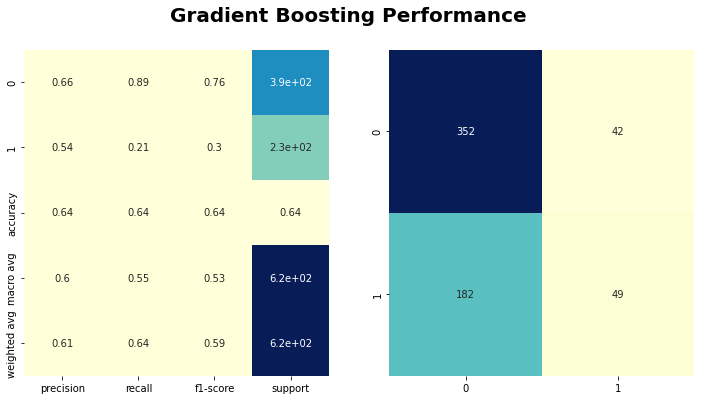

ROC AUC Score: 0.5527611136748193


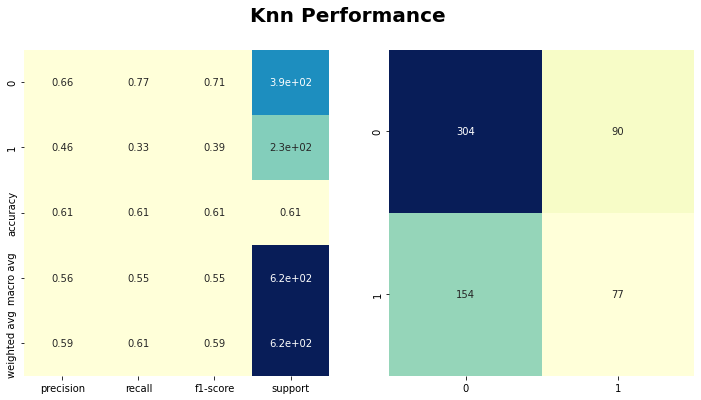

ROC AUC Score: 0.5524534686971234


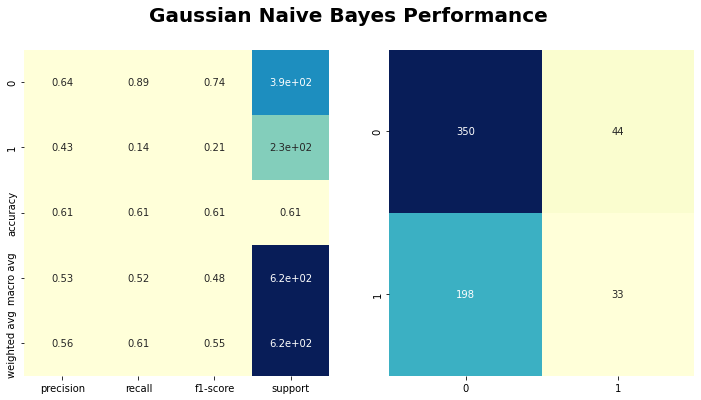

ROC AUC Score: 0.5155910079767947


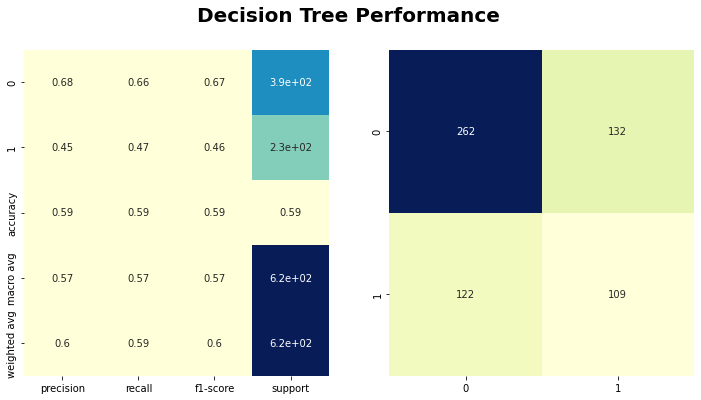

ROC AUC Score: 0.568418045575406


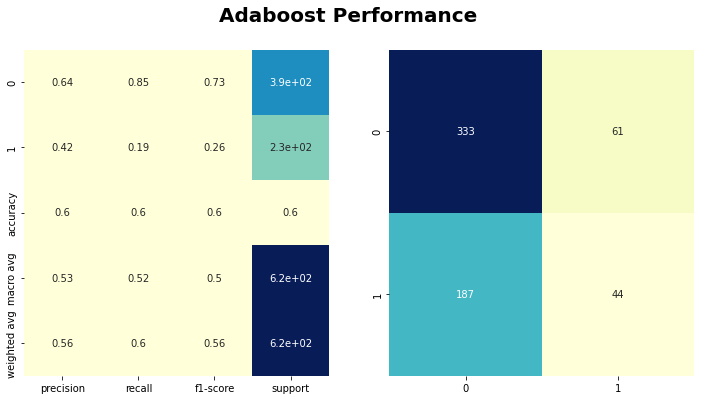

ROC AUC Score: 0.517826927725405


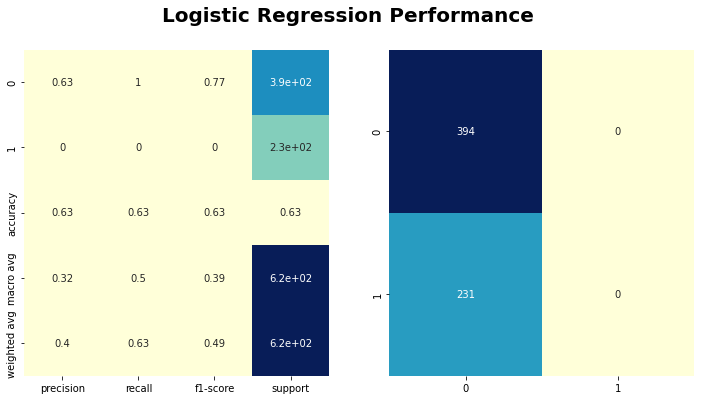

ROC AUC Score: 0.5


In [62]:
def plot_model_performance(model_name, X_train, y_train, X_test, y_test, figsize=(12, 6)):
    model = models[model_name].fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    clf_report = classification_report(y_test, y_pred, output_dict=True)
    clf_report = pd.DataFrame(clf_report).T
    roc_score = roc_auc_score(y_test, y_pred)
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    plt.suptitle(f'{model_name.title()} Performance', weight='bold', size=20)
    
    sns.heatmap(clf_report, annot=True, cmap='YlGnBu', ax=ax[0], cbar=False)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=ax[1], cbar=False)
    
    plt.show()
    print(f'ROC AUC Score: {roc_score}')

for mode_name in results.index:
    
    plot_model_performance(mode_name, X_train, y_train, X_test, y_test)

### Conclusion

* No model is able to give a good Precision, with max being around 0.6.
* Random Forest, Gradient Boosting and XGBoost are the best models for this dataset.